In [3]:
%pylab inline
import yt
import glob
import os

Populating the interactive namespace from numpy and matplotlib


In [4]:
k_list = []
os.chdir("../scivis2MMBK/")
for k in glob.glob("*.out"):
    try:
        k_list.append(int(k.split('.')[0][:-7]))
    except ValueError:
        continue
k_list = sort(list(set(k_list)))
print k_list 

[10000 20000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000
 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 55000
 60000]


In [5]:
import thingking
import matplotlib.colors as col
import matplotlib.cm as cm
import sys, string, math

def discrete_cmap(N=8):
    """create a colormap with N (N<15) discrete colors and register it"""
    # define individual colors as hex values
    cpool = [ '#000000', '#ff0000', '#00e000', '#0000ff', '#00e0e0',
              '#ff00ff', '#e0e000', '#ffa500', '#ee82ee', '#808080',
              '#800000', '#008000', '#000080', '#808000', '#800080' ]
    cmap3 = col.ListedColormap(cpool[0:N], 'indexed')
    cm.register_cmap(cmap=cmap3)

discrete_cmap(5)
color=cm.get_cmap('indexed')

In [ ]:
mf_prefix = "http://darksky.slac.stanford.edu/data_release/mass_function/"
mfs = [
    "ds14_a_halos_1.0000.hist8_m200b"#,
]
mfs = [mf_prefix + mf for mf in mfs]
halo_catalog = np.loadtxt("../../darksky_catalog/ds14_a_halos_1.0000_filter_1e15.txt",skiprows=3)
m=3.9e10
N= halo_catalog[:,4]/m #number of particle per halo = m200b/mass per particle
m200b= halo_catalog[:,4]
n_1, bins, patches  = plt.hist(m200b)#,log=True)#,histtype='step',color="red");

### Adding in real data

In [8]:
# # for k in k_list
# centers  = np.loadtxt("../scivis2MMBK/centers40000.txt")
# labels  = np.loadtxt("../scivis2MMBK/labels40000.txt")
# density  = np.loadtxt("../scivis2MMBK/density40000.txt")

In [9]:
pwd

u'/global/project/projectdirs/astro250/doris/halo/halo_find/scivis2MMBK'

In [17]:
k=4000
centers  = np.loadtxt("../../../clustered_data/centers{}.txt".format(k))
labels  = np.loadtxt("../../../clustered_data/labels{}.txt".format(k))
density  = np.loadtxt("../../../clustered_data/density{}.txt".format(k))
idx_list = []
N_list = []
for i in np.arange(k): 
    idx = np.where(labels==i)[0]
    idx_list.append(idx)
    N_list.append(len(idx))
idx = np.array(idx_list)
N = np.array(N_list)

(array([ 38.,   2.,   3., ...,   0.,   0.,   1.]),
 array([  0.00000000e+00,   5.29207792e+11,   1.05841558e+12, ...,
          5.28678584e+14,   5.29207792e+14,   5.29737000e+14]),
 <a list of 1001 Patch objects>)

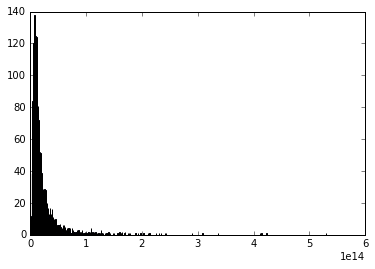

In [27]:
# xmin = min(m200b_2)
# xmax = max(m200b_2)
# step = 1000
n_2, bins_2 = np.histogram(m200b_2,1000)#, bins=np.linspace(xmin, xmax, (xmax-xmin)/step))
plt.hist(m200b_2, bins=bins_2.size)

In [ ]:
m200b_2 =N*m
n_2, bins_2, patches  = np.histogram(m200b_2)
print n_2

[  3.73800000e+03   1.80000000e+02   4.60000000e+01   2.20000000e+01
   7.00000000e+00   2.00000000e+00   1.00000000e+00   3.00000000e+00
   0.00000000e+00   1.00000000e+00]


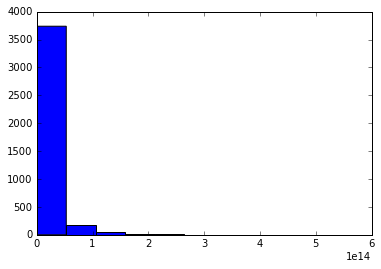

In [18]:
m200b_2 =N*m
n_2, bins_2, patches  = plt.hist(m200b_2,bins=)
print n_2

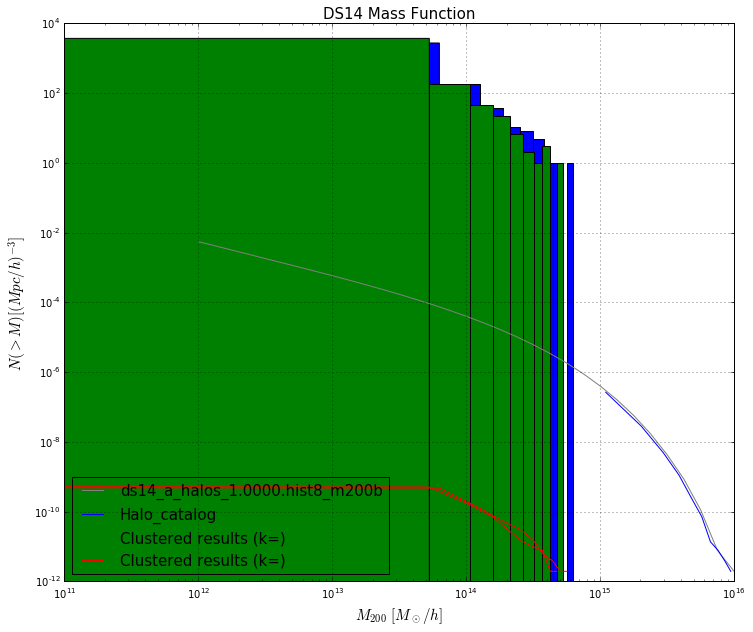

In [13]:
V = 8000**3
i=0
fig = plt.figure(figsize=(12,10))
xx = fig.add_subplot(111)
vols = np.array([8000.0, 1600, 800, 200, 100])
for aname, vol in zip(mfs, vols):
    bin_center_mass, dn_dlnM, sigma, dlogsdlogm, lower_pmass, n, expected, dm, ds, dlnm, dlns = thingking.loadtxt(aname, unpack=True)
    tag = aname.split("/")[-1]
    mask = (lower_pmass[:] >= 0) * (n[:] >= 0)
    if n.sum() > 0:
        ngtm = np.cumsum(n[mask][::-1])[::-1]
        xx.loglog(bin_center_mass[mask], ngtm/vol**3,ms=4, mec='None', color="gray",label=tag)#, label=tag)
    i += 1

ngtm = np.cumsum(n_1[::-1])[::-1]
a=1.1
xx.loglog(bins[:-1]*a, ngtm/V,label="Halo_catalog",ms=4, mec='None',color="blue")


#     k=4000
for k in [3000,4000]:
    centers  = np.loadtxt("../../../clustered_data/centers{}.txt".format(k))
    labels  = np.loadtxt("../../../clustered_data/labels{}.txt".format(k))
    density  = np.loadtxt("../../../clustered_data/density{}.txt".format(k))
    idx_list = []
    N_list = []
    for i in np.arange(k): 
        idx = np.where(labels==i)[0]
        idx_list.append(idx)
        N_list.append(len(idx))
    idx = np.array(idx_list)
    N = np.array(N_list)
    m200b_2 =N*m
    n_2, bins_2, patches  = plt.hist(m200b_2)
    ngtm2 = np.cumsum(n_2[::-1])[::-1]
    xx.loglog(bins_2[:-1], ngtm2/V,label="Clustered results (k=)".format(k),ms=4, mec='None',color="red")

xx.set_title('DS14 Mass Function',fontsize=15)
xx.set_xscale('log')
xx.set_yscale('log')
xx.set_xlabel('$M_{200}\  [M_\odot/h]$', fontdict={'fontsize':14},fontsize=15)
xx.set_ylabel('$N(>M) [(Mpc/h)^{-3}]$', fontdict={'fontsize':14},fontsize=15)
leg = xx.legend(loc="lower left",labelspacing=.5,fontsize=15)
xx.xaxis.grid(True, which='major')
xx.yaxis.grid(True, which='major')
plt.xlim(1e11,1e16)
plt.show()

In [ ]:
_ = plt.hist(N,100)

In [ ]:
mean(N)